<h1 align="center">Classifying EU Sustainability Performance</h1>

<h2 align="center">Part 1. Data Exploration & Understanding</h2>

<h3 align="center"> 1.1. Loading and Data Wrangling </h3>
   

---
<b> <i> Description of the variables (methodology of the Europe Sustainable Development Report 2025)</i></b><br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.read_csv("D:/Portfolio/Classifying EU Sustainability Performance/eu_sdg_performance_data.csv")

| Variable              | Description                                                    | Unit in dataset                                 |
| --------------------- | -------------------------------------------------------------- | ----------------------------------------------- |
| **year**              | Year of observation                                            | year (2015–2024)                                |
| **sdgi\_score**       | SDG Index (aggregate sustainability performance score)         | scale 0–100                                     |
| **performance\_tier** | Sustainability performance classification                      | 0 = Needs Improvement, 1 = Good, 2 = Leaders    |
| **sdg8\_income**      | Average income per capita (GDP per capita, PPP)                | € per person (≈ 8,800 – 39,000)                 |
| **sdg8\_unemp**       | Unemployment rate                                              | % of population (2 – 26%)                       |
| **sdg8\_inwork**      | Employment-to-population ratio                                 | % of population (3 – 19%)                       |
| **sdg9\_eurd**        | Expenditure on R\&D                                            | % of GDP (0 – 4%)                               |
| **sdg9\_digital**     | Basic digital skills of the population                         | % of population (28 – 83%)                      |
| **sdg9\_bband**       | Broadband internet coverage                                    | % of households (59 – 100%)                     |
| **sdg16\_cpi**        | Corruption Perception Index (Transparency International)       | scale 0–100 (34 – 91; higher = less corruption) |
| **sdg16\_rsf**        | Press Freedom Index (Reporters Without Borders)                | scale 0–100 (32 – 95; higher = freer press)     |
| **sdg16\_crime**      | Crime/Safety index                                             | normalized index 1–26 (lower = less crime)      |
| **sdg4\_tertiary**    | Population with tertiary education                             | % of adults (23 – 63%)                          |
| **sdg4\_adult**       | Adult participation in education/training                      | % of adults (1 – 39%)                           |
| **sdg7\_eurenew**     | Share of renewable energy in final energy consumption          | % (5 – 84%)                                     |
| **sdg13\_co2gcp**     | CO₂ emissions per capita                                       | tons CO₂ per person (≈ 3 – 16.6)                |
| **sdg5\_empgap**      | Gender employment gap                                          | % difference between men and women (0 – 43%)    |
| **sdg10\_gini**       | Gini coefficient (income inequality)                           | 21 – 45 (scale typical for Europe)              |


---
<b> <i> Distinct values of the variable Country </i></b></br>


In [2]:
countries = sorted(df_original["Country"].unique())
for c in countries:
    print(repr(c)) 
print("\nNumber of unique values in column 'Country':", df_original["Country"].nunique())

'Austria'
'Baltic States'
'Belgium'
'Bulgaria'
'Candidate Countries'
'Central and Eastern Europe'
'Croatia'
'Cyprus'
'Czechia'
'Denmark'
'EFTA Countries'
'Estonia'
'European Union'
'Finland'
'France'
'Germany'
'Greece'
'Hungary'
'Iceland'
'Ireland'
'Italy'
'Latvia'
'Lithuania'
'Luxembourg'
'Malta'
'Netherlands'
'North Macedonia'
'Northern Europe'
'Norway'
'Poland'
'Portugal'
'Romania'
'Serbia'
'Slovak Republic'
'Slovenia'
'Southern Europe'
'Spain'
'Sweden'
'Switzerland'
'TŸrkiye'
'United Kingdom'
'Western Europe'

Number of unique values in column 'Country': 42


---
</br>
<b> <i> "All in the same pot" =)</i></b></br>

</br>


In the prepared dataset, the Country column contained a mix of individual countries (e.g., Germany, Poland, Romania) and regional aggregations/unions (European Union, Baltic States, Candidate Countries, etc.). There are only 42 unique values of the variable "Country", 8 of which are not individual countries but Europe Subregions.

<b>Potential problems:</b>
1. <b>"Inconsistent Granularity".</b> The dataset contains information at two different levels: individual countries (low aggregation) and regional groups (high aggregation). This inconsistency can distort the analysis, as the model would be trained on data with varying levels of granularity.
2. <b>Alignment with Project Goal.</b> The main project goal is to identify the factors that influence the distribution of individual European countries across three levels. Including aggregated data that describes Europe Subregions contradicts this objective. Removing this data ensures the model focuses exclusively on the relevant features.
3. <b>Bias.</b> European subregions reflect only average indicators for entire regions and do not account for the unique characteristics of individual countries. Their inclusion may introduce bias, since the model would be trained on aggregated data that do not correspond to the actual classification targets.

Removing Europe Subregions from the dataset makes model more understandable. This allows us to be confident that the conclusions we draw from the model (for example, identifying key factors influencing the classification) truly relate to individual countries and not to the averaged characteristics of entire Europe Subregions. This makes our results more reliable and meaningful for decision-making.

So, <b>~340 observations</b> (34 countries × 10 years)

In [3]:
regions_to_exclude = [
    'Baltic States',
    'Candidate Countries',
    'Central and Eastern Europe',
    'EFTA Countries',
    'European Union',
    'Northern Europe',
    'Southern Europe',
    'Western Europe'
]
df= df_original[~df_original['Country'].isin(regions_to_exclude)].copy()
df_regions = df_original[df_original['Country'].isin(regions_to_exclude)].copy()

Replace the county's name:

In [4]:
df["Country"] = df["Country"].replace("TŸrkiye", "Turkey")

</br>For the following analysis, we need to properly impute all NaN values.
Let's find the number of NaN values and the countries/columns that contain them.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 409
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           340 non-null    object 
 1   year              340 non-null    int64  
 2   sdgi_score        340 non-null    float64
 3   performance_tier  340 non-null    int64  
 4   sdg8_income       330 non-null    float64
 5   sdg8_unemp        330 non-null    float64
 6   sdg8_inwork       340 non-null    int64  
 7   sdg9_eurd         340 non-null    int64  
 8   sdg9_digital      330 non-null    float64
 9   sdg9_bband        340 non-null    int64  
 10  sdg16_cpi         340 non-null    int64  
 11  sdg16_rsf         340 non-null    int64  
 12  sdg16_crime       340 non-null    int64  
 13  sdg4_tertiary     340 non-null    int64  
 14  sdg4_adult        340 non-null    int64  
 15  sdg7_eurenew      310 non-null    float64
 16  sdg13_co2gcp      340 non-null    float64
 17  sd

In [6]:
nan_per_column = df.isnull().sum()
print("\nNaN per column:\n", nan_per_column)
total_nan = df.isnull().sum().sum()
print("\nTotal number of NaN:", total_nan)


NaN per column:
 Country              0
year                 0
sdgi_score           0
performance_tier     0
sdg8_income         10
sdg8_unemp          10
sdg8_inwork          0
sdg9_eurd            0
sdg9_digital        10
sdg9_bband           0
sdg16_cpi            0
sdg16_rsf            0
sdg16_crime          0
sdg4_tertiary        0
sdg4_adult           0
sdg7_eurenew        30
sdg13_co2gcp         0
sdg5_empgap         10
sdg10_gini           0
dtype: int64

Total number of NaN: 70


In [7]:
missing_dict = (
    df.drop(columns=["Country"])
      .groupby(df["Country"])
      .apply(lambda g: g.isna().any()[lambda x: x].index.tolist())
      .to_dict()
) 
missing_nonempty = {k: v for k, v in missing_dict.items() if v}
print("\nCountries with missing values (NaN):")
for country, cols in missing_nonempty.items():
    print(f"\t{country}: {cols}")



Countries with missing values (NaN):
	North Macedonia: ['sdg8_income']
	Switzerland: ['sdg7_eurenew']
	Turkey: ['sdg7_eurenew']
	United Kingdom: ['sdg8_unemp', 'sdg9_digital', 'sdg7_eurenew', 'sdg5_empgap']


---

<b> <i> "So what do we get instead?" </i></b></br>


Unfortunately, we cannot use real data from other sources (the World Bank or Eurostat), as the research methodologies different and the required data are simply unavailable.
That's why we will follow the strategy: <b>imputation will be based on the Europe Subregionals values</b>.

<b>df</b> — the main dataset with individual countries</br>
<b>df_regions</b> — the dataset with Europe Subregionals values (Candidate Countries, EFTA Countries, ...). 

The <b>df_regions</b> subset already contains <b>averaged indicators</b> for the corresponding country groups.</br> 
Therefore, <b>during imputation we will substitute the values for the respective year from the appropriate Europe Subregion</b> (according to "Full data base" info): missing values for ... from ...

- North Macedonia ← Candidate Countries
- Switzerland ← EFTA Countries
- Turkey ← Candidate Countries
- United Kingdom ← Western Europe

In [8]:
#This dictionary defines the mapping between an individual country and its Europe Subregion.
union_map = {
    'North Macedonia': 'Candidate Countries',
    'Switzerland': 'EFTA Countries',
    'Turkey': 'Candidate Countries',
    'United Kingdom': 'Western Europe',
}
#This dictionary specifies which variables are missing for each country
missing_nonempty

#We will create new function impute_from_unions
def impute_from_unions(df, df_regions, union_map, missing_nonempty,
                       country_col='Country', year_col='year'):
    out = df.copy()
    for country, cols in missing_nonempty.items():
        union = union_map.get(country)
        if not union:
            continue
        for col in cols:
            if col not in out.columns or col not in df_regions.columns:
                continue
            union_series = (
                df_regions[df_regions[country_col] == union][[year_col, col]]
                .dropna()
                .set_index(year_col)[col]
            )
            if union_series.empty:
                continue
            mask = (out[country_col] == country) & (out[col].isna())
            out.loc[mask, col] = out.loc[mask, year_col].map(union_series)
    return out

df = impute_from_unions(df, df_regions, union_map, missing_nonempty)

Let's revise the results of data preprocessing

In [9]:
total_nan = df.isnull().sum().sum()
print("\nTotal number of NaN:", total_nan)


Total number of NaN: 0


In [10]:
#We will save cleaned date to new CSV file:
df.to_csv("cleaned_data.csv", index=False, encoding="utf-8")

<h3 align="center"> 1.2. Exploratory Data Analysis for target variable performance_tier	</h3>

<b> <i> Statistics of performance_tier</i></b></br>
<i>It is important to note that the analysis is conducted on data where regional groupings have been removed and missing values have already been imputed.</i>

In [11]:
pivot_table = df.groupby(["performance_tier", "year"]).size().unstack(fill_value=0)
print("\nNumber of countries in performance_tier for each year:\n", pivot_table)


Number of countries in performance_tier for each year:
 year              2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
performance_tier                                                            
0                   10     8     8     8     7     6     6     6     6     6
1                   20    22    21    21    22    22    22    22    23    22
2                    4     4     5     5     5     6     6     6     5     6


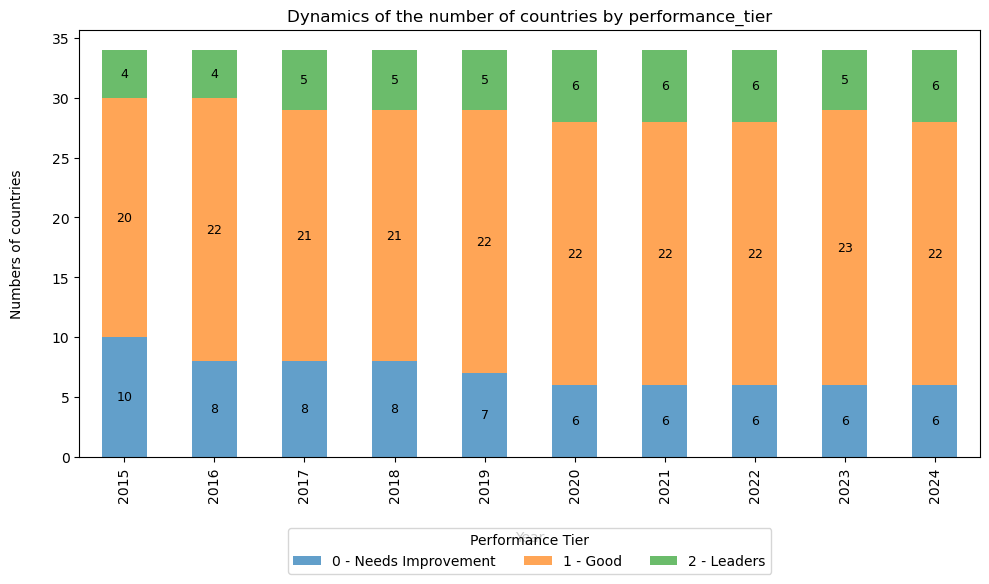

In [12]:
tier_labels = {
    0: "0 - Needs Improvement",
    1: "1 - Good",
    2: "2 - Leaders"
}
pivot_table = df.groupby(["year", "performance_tier"]).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bars = pivot_table.plot(kind="bar", stacked=True, ax=ax, alpha=0.7, zorder=1)

plt.title("Dynamics of the number of countries by performance_tier")
ax.legend(
    title="Performance Tier",
    labels=[tier_labels[col] for col in pivot_table.columns],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3
)
plt.xlabel("Year", labelpad=20)
plt.ylabel("Numbers of countries", labelpad=20)

for container in bars.containers:
    ax.bar_label(container, label_type="center", fontsize=9, color="black")

plt.grid(False)
plt.tight_layout()
plt.show()

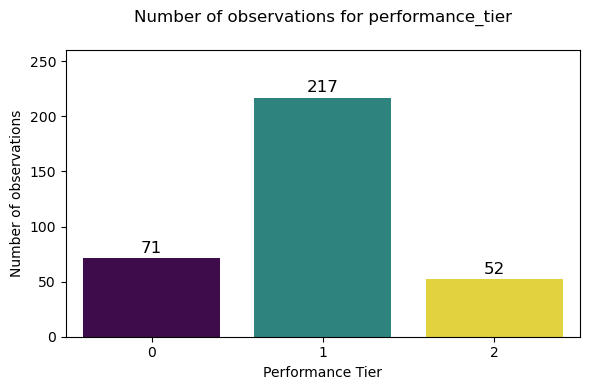

In [13]:
counts = df["performance_tier"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x=counts.index,
    y=counts.values,
    hue=counts.index,
    palette="viridis",
    legend=False
)

for i, v in enumerate(counts.values):
    ax.text(i, v + 2, str(v), ha="center", va="bottom", fontsize=12)

plt.xlabel("Performance Tier")
plt.ylabel("Number of observations")
plt.title("Number of observations for performance_tier", pad=20)

ax.set_ylim(0, counts.max() * 1.20) 
plt.tight_layout()
plt.show()

---

**_Pearson Correlation Coefficients for performance_tier_**  

Based on the correlation analysis, it is possible to assess the degree of influence of individual factors on the target variable *performance_tier*.  
The most influential factors include:  

- **sdg16_cpi** – Corruption Perception Index (Transparency International)  
- **sdg9_eurd** – Expenditure on R&D  
- **sdg9_digital** – Basic digital skills of the population  
- **sdg4_adult** – Adult participation in education/training  
- **sdg16_rsf** – Press Freedom Index (Reporters Without Borders)  
- **sdg8_income** – Average income per capita (GDP per capita, PPP)  
- **sdg10_gini** – Gini coefficient (income inequality)  

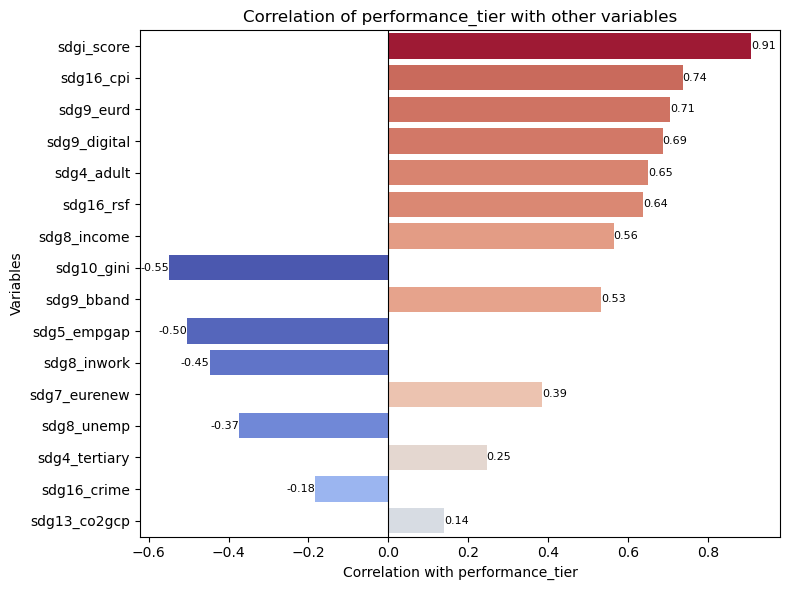

In [14]:

corr = df.corr(numeric_only=True)["performance_tier"].drop(["performance_tier", "year"])
corr = corr.reindex(corr.abs().sort_values(ascending=False).index)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=corr.values,
    y=corr.index,
    hue=corr.values,
    palette="coolwarm",
    dodge=False,
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=8)

plt.axvline(0, color="black", linewidth=0.8)
plt.xlabel("Correlation with performance_tier")
plt.ylabel("Variables")
plt.title("Correlation of performance_tier with other variables")
plt.tight_layout()
plt.show()

---

<b> <i> What distinguishes "Sustainability Leaders" from "Needs Improvement" countries? </i></b></br>

To answer this question, we will analyze the mean values of the factor variables, and, using box plots, we will further explore the distribution of these factors by examining their range, quartiles, median values, and the presence of outliers across the performance tiers.

In [15]:
num_cols = df.select_dtypes("number").columns.drop(["year", "performance_tier"])
means = df.groupby("performance_tier")[num_cols].mean().T
print("\nMean values of features across performance_tier :\n", means)


Mean values of features across performance_tier :
 performance_tier             0             1             2
sdgi_score           60.191549     70.412442     78.146154
sdg8_income       15438.661972  22042.599078  26995.211538
sdg8_unemp           10.915493      6.718894      6.019231
sdg8_inwork          10.521127      8.027650      6.192308
sdg9_eurd             0.732394      1.622120      2.865385
sdg9_digital         38.211268     59.649770     69.711538
sdg9_bband           80.295775     89.631336     94.134615
sdg16_cpi            44.943662     64.958525     83.461538
sdg16_rsf            67.028169     79.682028     88.846154
sdg16_crime          11.323944      9.552995      8.288462
sdg4_tertiary        38.267606     43.608295     45.288462
sdg4_adult            4.718310     12.677419     23.365385
sdg7_eurenew         21.338028     25.414747     46.692308
sdg13_co2gcp          5.399014      6.705714      6.376346
sdg5_empgap          17.507042      9.682028      5.500000
sdg1


Box plots for features with highest correlation:



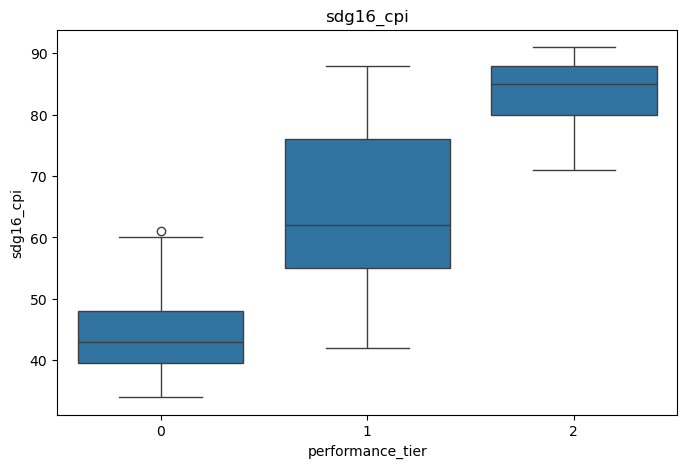

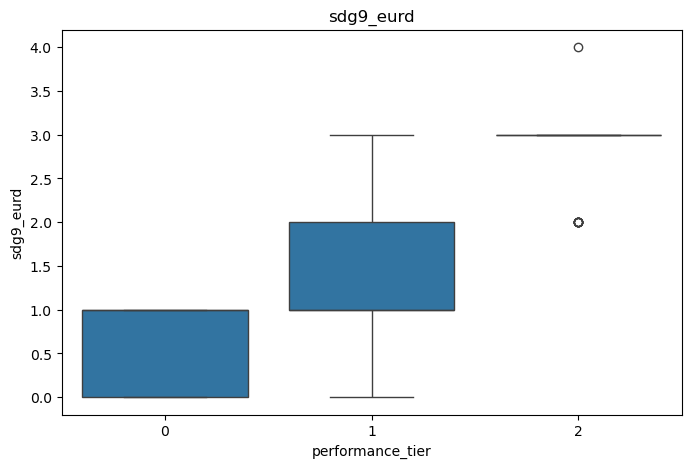

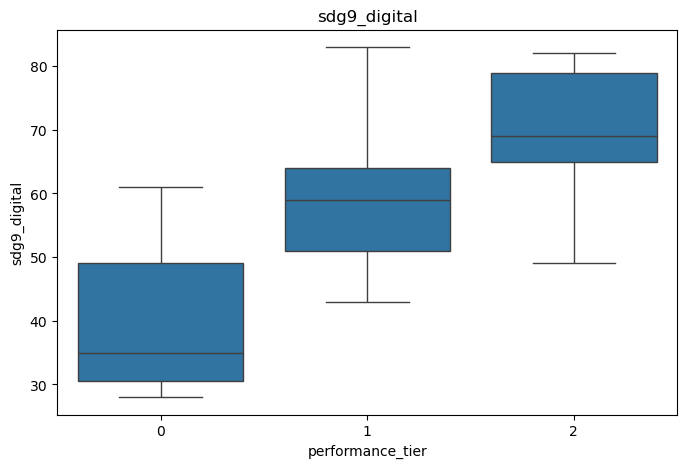

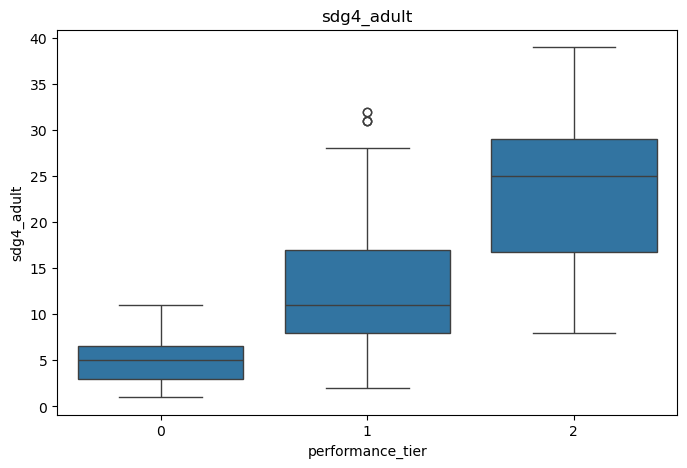

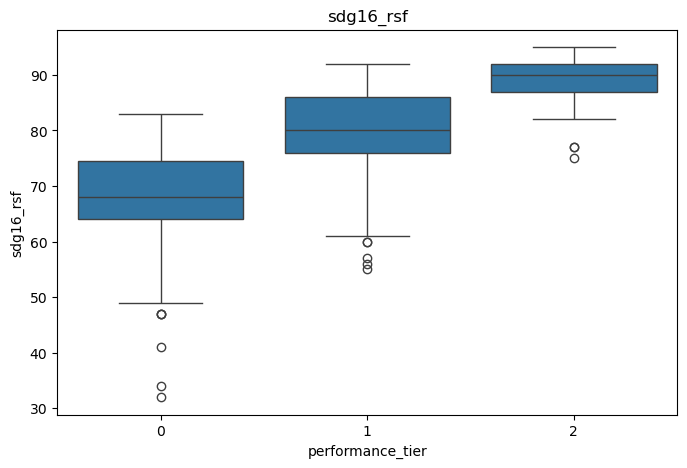

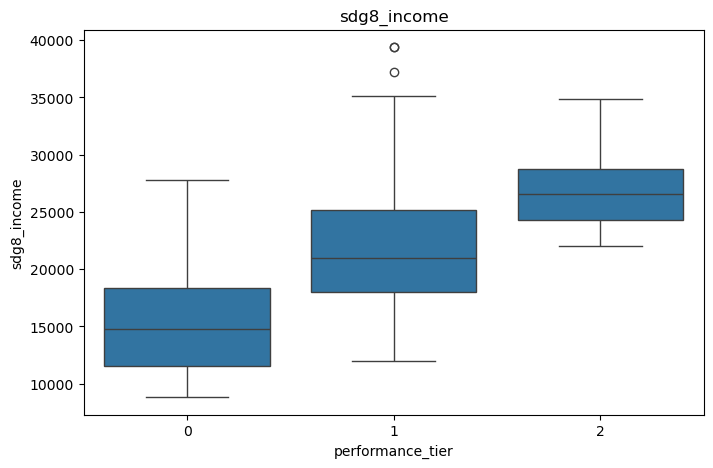

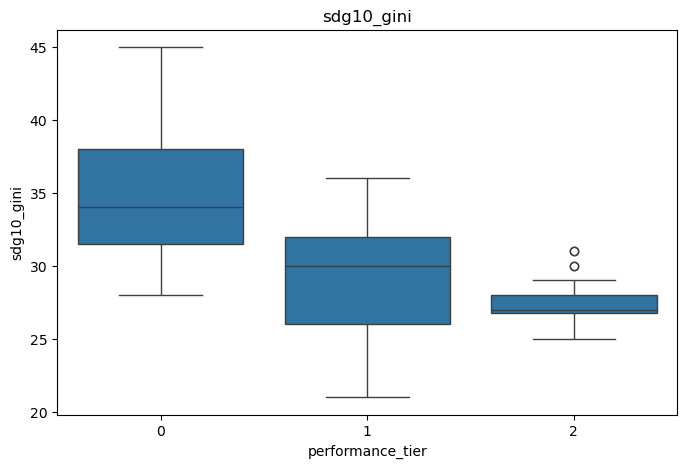

In [16]:
print("\nBox plots for features with highest correlation:\n")
for var in ["sdg16_cpi", "sdg9_eurd", "sdg9_digital", "sdg4_adult", "sdg16_rsf", "sdg8_income", "sdg10_gini"]:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="performance_tier", y=var)
    plt.title(var)
    plt.show()

We will analyze the distribution of the SDGI Score depending on each individual factor, overlaying performance tier labels on the plots. 

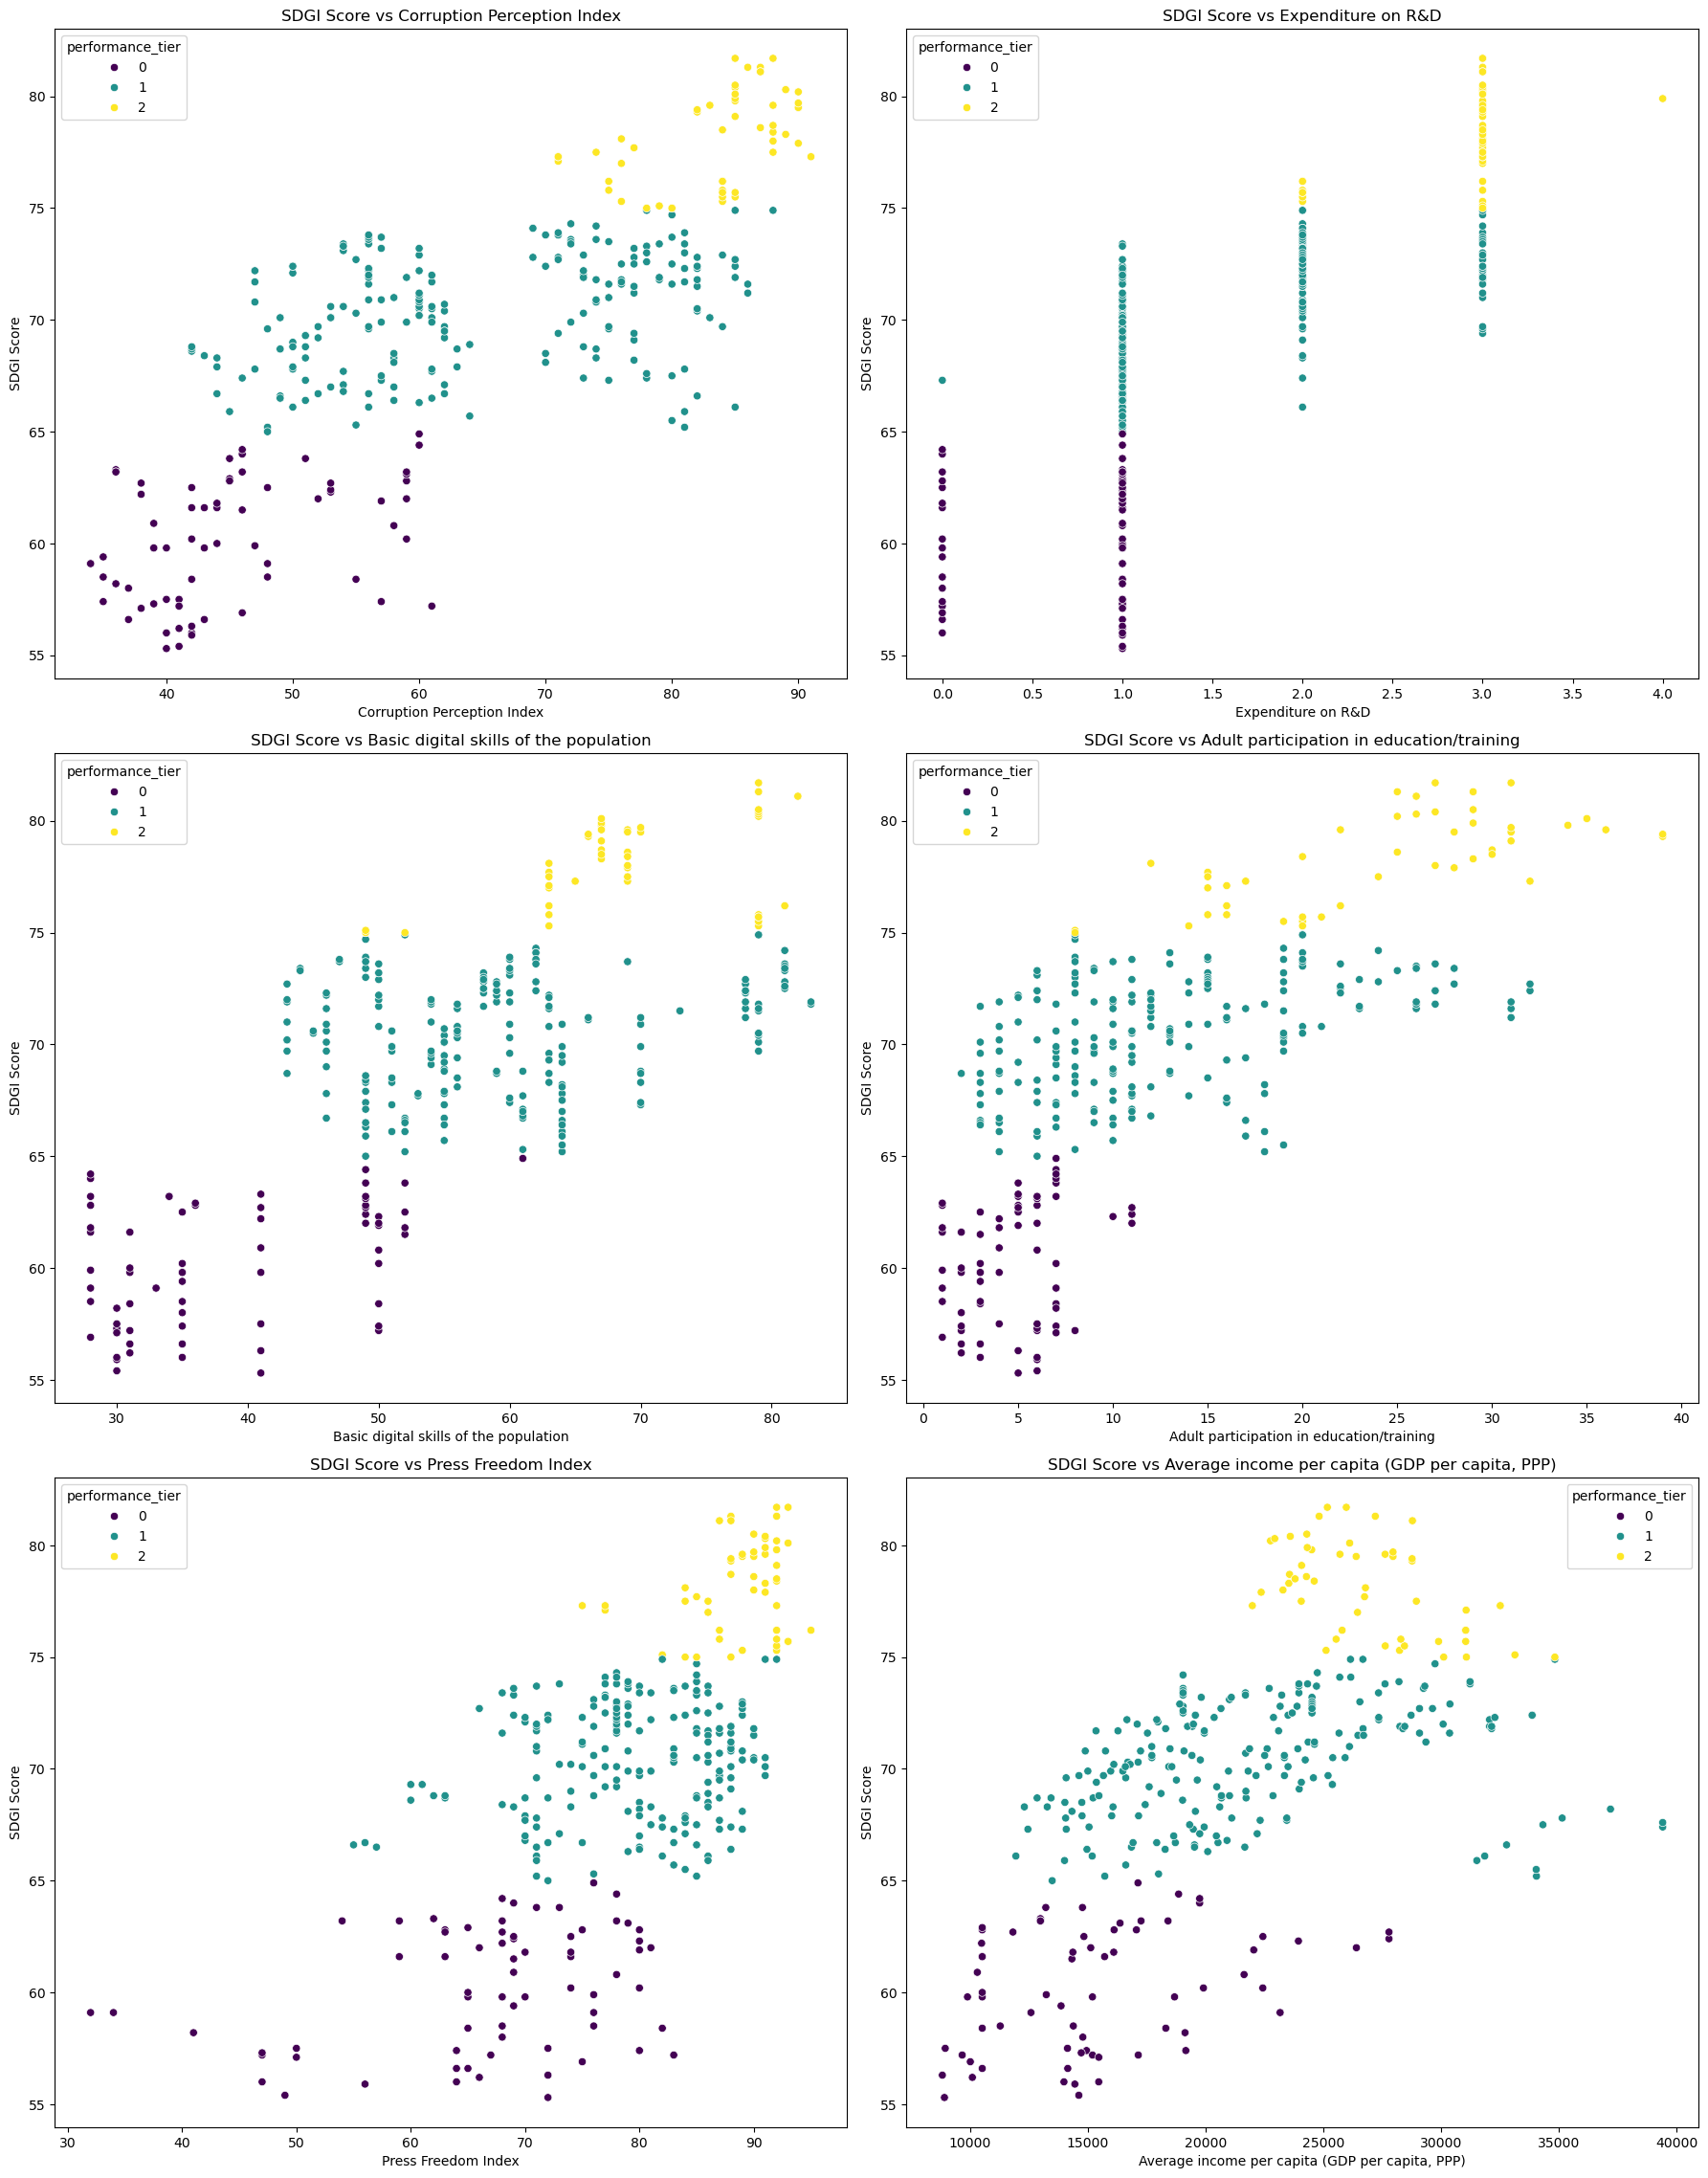

In [17]:
x_vars = {
    "sdg16_cpi": "Corruption Perception Index",
    "sdg9_eurd": "Expenditure on R&D",
    "sdg9_digital": "Basic digital skills of the population",
    "sdg4_adult": "Adult participation in education/training",
    "sdg16_rsf": "Press Freedom Index",
    "sdg8_income": "Average income per capita (GDP per capita, PPP)",
}

fig, axes = plt.subplots(4, 2, figsize=(18, 30))
axes = axes.flatten()

for i, (col, label) in enumerate(x_vars.items()):
    sns.scatterplot(
        data=df,
        x=col,
        y="sdgi_score",
        hue="performance_tier",
        palette="viridis",
        ax=axes[i]
    )
    axes[i].set_xlabel(label)
    axes[i].set_ylabel("SDGI Score")
    axes[i].set_title(f"SDGI Score vs {label}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

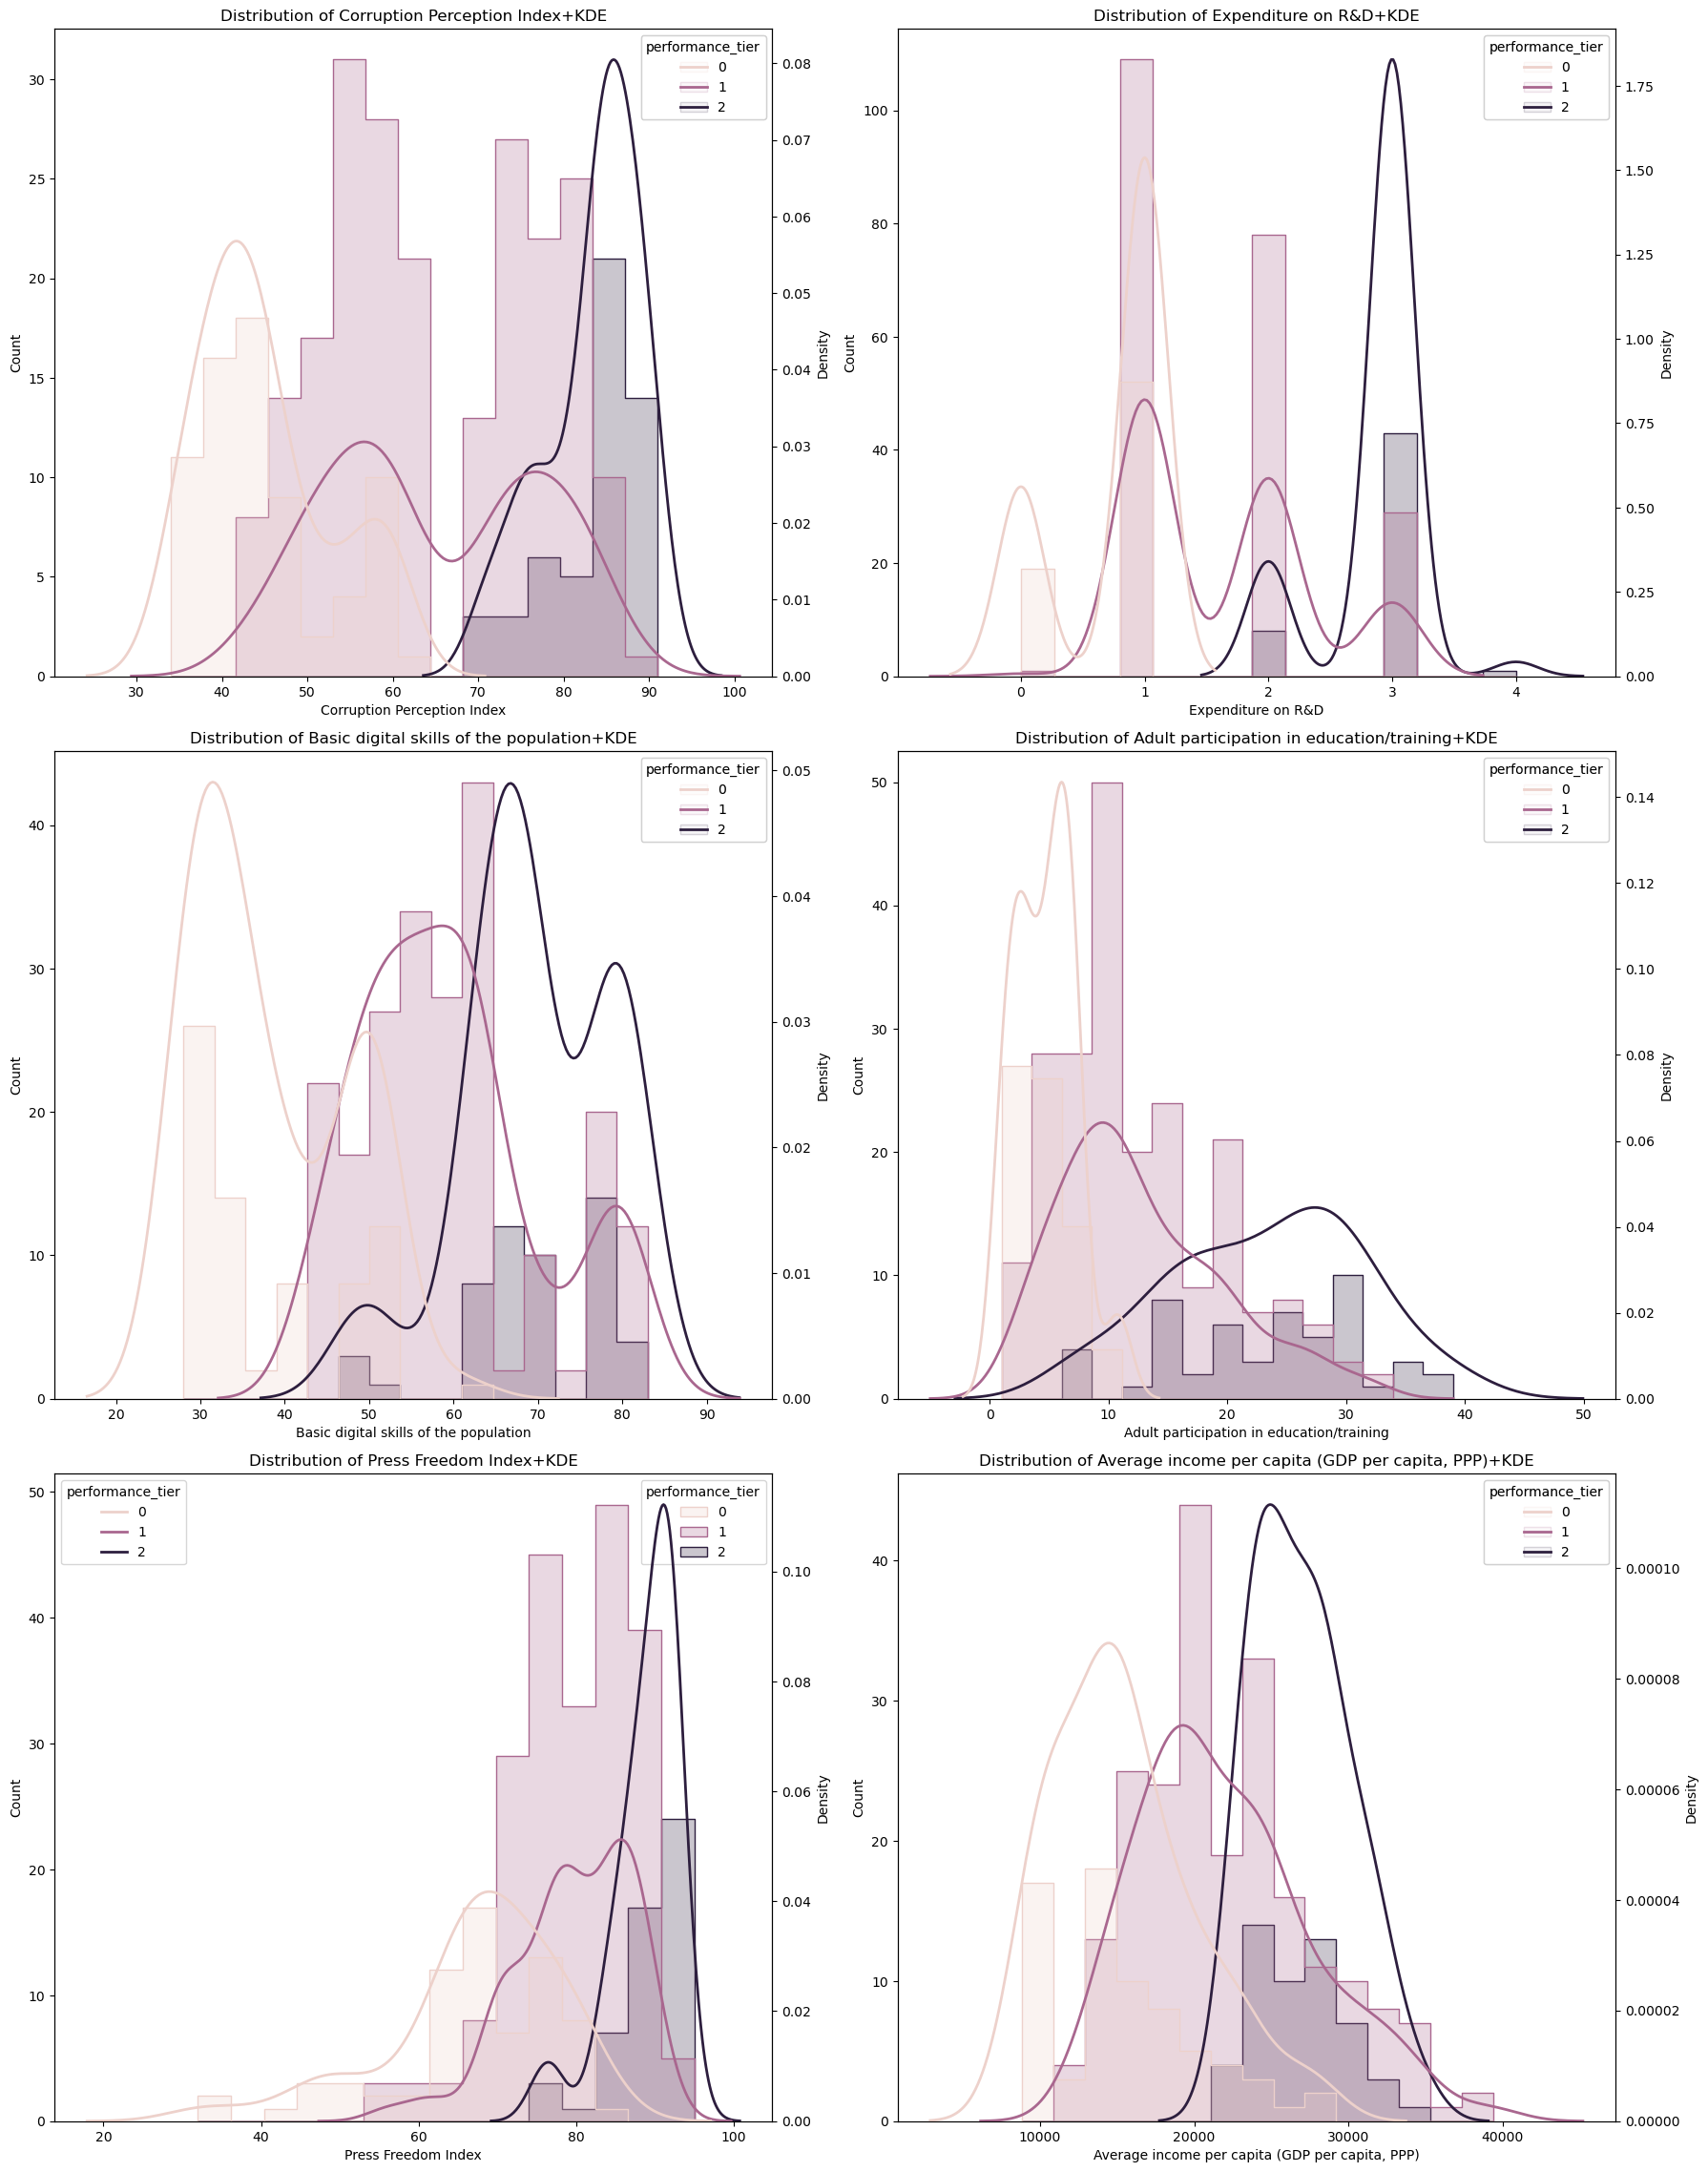

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(18, 30))
axes = axes.flatten()

for i, (col, label) in enumerate(x_vars.items()):
    ax1 = axes[i]

    sns.histplot(
        data=df,
        x=col,
        bins=15,
        hue="performance_tier",
        element="step",
        stat="count",
        common_norm=False,
        ax=ax1
    )
    ax1.set_xlabel(label)
    ax1.set_ylabel("Count")

    ax2 = ax1.twinx()
    sns.kdeplot(
        data=df,
        x=col,
        hue="performance_tier",
        common_norm=False,
        lw=2,
        ax=ax2
    )
    ax2.set_ylabel("Density")

    ax1.set_title(f"Distribution of {label}+KDE")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



<h2 align="center">Part 2. Model Training and Evaluation </h2>
<h3 align="center"> 2.1.Logistic Regression</h3>

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
X = df.drop(["performance_tier", "sdgi_score", "Country", "year"], axis=1)
y = df["performance_tier"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=1000))
])

param_grid = {
    "log_reg__C": [0.01, 0.1, 1, 10],
    "log_reg__penalty": ["l1", "l2"],
    "log_reg__solver": ["liblinear", "saga"]  
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    refit=True,
    return_train_score=False
)

grid.fit(X_train, y_train)


best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

f1_weighted = metrics.f1_score(y_test, y_pred, average="weighted")
accuracy = metrics.accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nBest params:\n", grid.best_params_)
print("Best CV score (mean F1_weighted over 5 folds):", grid.best_score_)

print("\nTest set performance")
print("Accuracy:", accuracy)
print("F1 (weighted):", f1_weighted)
print("\nConfusion matrix:\n", cm)
print("\nClassification report:\n", report)

cv_scores = cross_val_score(
    best_model, X, y,
    cv=10,
    scoring="f1_weighted",
    n_jobs=-1
)

print("\n10-fold Cross-Validation of the final model on ALL data")
print("Fold F1 scores:", np.round(cv_scores, 4))
print("Mean F1:", cv_scores.mean())
print("Std F1:", cv_scores.std())


logreg = best_model.named_steps["log_reg"]
coef = logreg.coef_
feature_names = X.columns

importance = np.mean(np.abs(coef), axis=0)
importances = pd.Series(importance, index=feature_names).sort_values(ascending=False)

print("\nTop-10 Logistic Regression feature importances:")
print(importances.head(10))

coef_df = pd.DataFrame(logreg.coef_, columns=feature_names, index=logreg.classes_)
print("\nCoefficients for classes(LogReg):")
print(coef_df.T.sort_values(by=logreg.classes_[0], ascending=False).head(10))


Best params:
 {'log_reg__C': 1, 'log_reg__penalty': 'l1', 'log_reg__solver': 'saga'}
Best CV score (mean F1_weighted over 5 folds): 0.9027785220273609

Test set performance
Accuracy: 0.8921568627450981
F1 (weighted): 0.8948817433210615

Confusion matrix:
 [[19  2  0]
 [ 1 58  6]
 [ 0  2 14]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.94      0.89      0.91        65
           2       0.70      0.88      0.78        16

    accuracy                           0.89       102
   macro avg       0.86      0.89      0.87       102
weighted avg       0.90      0.89      0.89       102


10-fold Cross-Validation of the final model on ALL data
Fold F1 scores: [0.618  0.8581 0.4397 0.7614 0.9094 0.9163 0.7989 0.7869 0.9693 0.7335]
Mean F1: 0.7791388503392856
Std F1: 0.14906495536286485

Top-10 Logistic Regression feature importances:
sdg9_eurd        1.154113
sdg9_digital     1.01590

The model distinguishes classes 0 (Needs Improvement) and 1 (Good Performers) very well, with high precision and recall for both groups.</br>
The main challenge remains with class 2 (Leaders): </br>
- recall is relatively strong (0.88),</br>
- precision is lower (0.70),</br>
- 2 “Leaders” are misclassified as “Good Performers.” </br>

This is likely due to the smaller sample size for class 2 and partial feature overlap with class 1. </br>
Overall, the model demonstrates robust performance (Accuracy ~0.89, weighted F1 ~0.89 on the test set), exceeding the project’s required threshold of 0.75. </br>

The most influential features relate to:
- innovation and digitalization (sdg9_eurd, sdg9_digital),
- governance and transparency (sdg16_cpi, sdg16_rsf),
- education/employment factors (sdg4_tertiary, sdg5_empgap).</br>

<h3 align="center"> 2.2.Random Forest</h3>

In [43]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import randint

# 1) Завантаження даних
df = pd.read_csv("cleaned_data.csv")

# 2) X / y
X = df.drop(columns=["performance_tier", "sdgi_score", "Country", "year"], errors="ignore")
y = df["performance_tier"]

# 3) Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4) Random Forest + RandomizedSearch
pipe_rf = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("rf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

param_dist_rf = {
    "rf__n_estimators": randint(300, 1200),
    "rf__max_depth": randint(3, 50),
    "rf__min_samples_split": randint(2, 20),
    "rf__min_samples_leaf": randint(1, 10),
    "rf__max_features": ["sqrt", "log2", None]
}

rs_rf = RandomizedSearchCV(
    pipe_rf, param_distributions=param_dist_rf, n_iter=50,
    cv=cv, scoring="f1_weighted", n_jobs=-1, random_state=42, refit=True
)

# 5) Навчання
rs_rf.fit(X_train, y_train)
y_pred_rf = rs_rf.predict(X_test)

# 6) Результати
print("\nBest params:\n", rs_rf.best_params_)
print("\nCV best f1_weighted:\n", rs_rf.best_score_)
print("\nTest Accuracy:\n", accuracy_score(y_test, y_pred_rf))
print("\nTest F1 (weighted):\n", f1_score(y_test, y_pred_rf, average="weighted"))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))

# 7) Топ-важливості ознак
final_rf = rs_rf.best_estimator_.named_steps["rf"]
importances = pd.Series(final_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop-10 RF feature importances:")
print(importances.head(10))


Best params:
 {'rf__max_depth': 11, 'rf__max_features': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 900}

CV best f1_weighted:
 0.9418263191846211

Test Accuracy:
 0.9607843137254902

Test F1 (weighted):
 0.9600802729891631

Confusion matrix:
 [[18  3  0]
 [ 0 65  0]
 [ 0  1 15]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.94      1.00      0.97        65
           2       1.00      0.94      0.97        16

    accuracy                           0.96       102
   macro avg       0.98      0.93      0.95       102
weighted avg       0.96      0.96      0.96       102


Top-10 RF feature importances:
sdg9_digital     0.382087
sdg16_cpi        0.197545
sdg9_eurd        0.088927
sdg4_tertiary    0.064170
sdg7_eurenew     0.055871
sdg16_rsf        0.048062
sdg13_co2gcp     0.039375
sdg10_gini       0.039187
sdg9_bband       0.028286
sdg5_empg


<h3 align="center"> 2.3.Key questions</h3>

**1. Which model performs best for multi-class classification?**  

**Random Forest** is the best for this task. With tuning it gives:  
- CV best f1_weighted: 0.94  
- Test Accuracy: 0.96  
- Test F1 (weighted): 0.96  

---

**2. What are the top 5 predictive features for sustainability performance?**  

Based on **feature importance (Random Forest):**  
- sdg9_digital → Basic digital skills of the population (% of population with basic digital skills)  
- sdg16_cpi → Corruption Perception Index (scale 0–100; higher = less corruption)  
- sdg9_eurd → Expenditure on R&D (% of GDP spent on research and development)  
- sdg4_tertiary → Population with tertiary education (% of adults with higher/tertiary education)  
- sdg7_eurenew → Share of renewable energy in final energy consumption (%)  

---

**3. Which tiers are most often confused with each other?**  

| Actual \ Predicted | Tier 0 (Needs Improvement) | Tier 1 (Good) | Tier 2 (Leaders) |
|--------------------|----------------------------|---------------|------------------|
| **Tier 0**         | 19                         | 2             | 0                |
| **Tier 1**         | 1                          | 58            | 6                |
| **Tier 2**         | 0                          | 2             | 14               |

- **Tier 0 (“Needs Improvement”)** → predicted correctly in most cases (19/21), with only 2 misclassified as Tier 1.  
- **Tier 1 (“Good”)** → mostly correct (58/65), but 6 were misclassified as Tier 2 (“Leaders”) and 1 as Tier 0.  
- **Tier 2 (“Leaders”)** → mostly correct (14/16), but 2 were misclassified as Tier 1 (“Good”).  

---

**4. How confident can we be in our tier predictions?**  

- **Logistic Regression** achieves ~89% accuracy and an F1 score of ~0.895, but cross-validation shows significant fluctuations across folds (mean F1 ≈ 0.78).  
- **Random Forest** demonstrates high quality and reliability, in contrast to Logistic Regression, which showed larger variability in results.  

96% accuracy → the model correctly classifies 96% of cases.  
F1 ~0.96 → the balance between precision and recall is also very high.  
CV ~0.94 → the mean F1 score in cross-validation (across different folds) is almost as high, which indicates that the model is stable (results do not fluctuate significantly across folds).  

Random Forest shows high confidence in predictions, especially for the extreme tiers (0 and 2). The main uncertainty lies in distinguishing between “Good” and “Leaders.”  

<h2 align="center">Part 3. Policy Insights and Use Case Documentation </h2>
<h3 align="center"> 3.1 Tier characterization</h3>

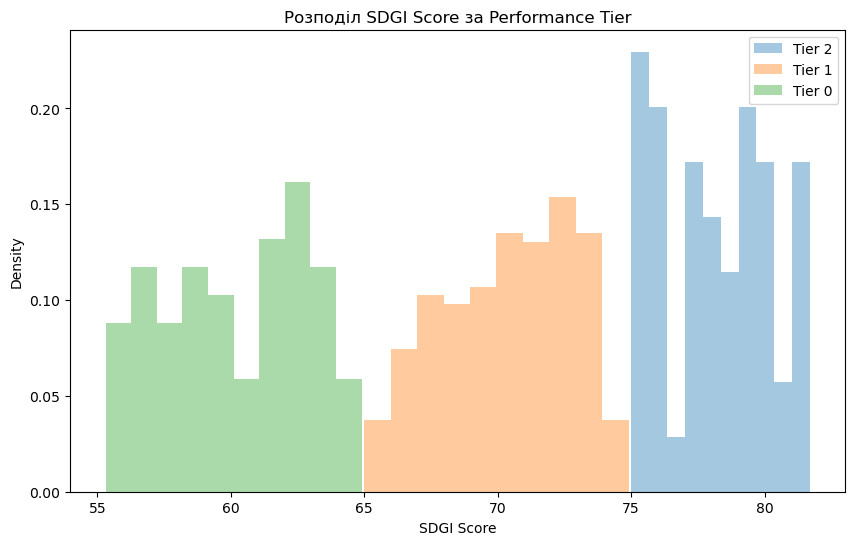

In [52]:
plt.figure(figsize=(10, 6))

for tier in df['performance_tier'].unique():
    subset = df[df['performance_tier'] == tier]
    
    # гістограма
    plt.hist(subset['sdgi_score'], 
             bins=10, 
             density=True,   # щоб криву було коректно накладати
             alpha=0.4, 
             label=f'Tier {tier}')
    
plt.xlabel("SDGI Score")
plt.ylabel("Density")
plt.title("Розподіл SDGI Score за Performance Tier")
plt.legend()
plt.show()



<h3 align="center"> 3.2 Policy recommendations</h3>
<h3 align="center"> 3.3 Country-specific insights</h3>
